In [36]:
#############IDEA#######################
#Predecir del tipo  desodorante es en base a los datos de entrada, varios valores de clasificacion.
from sklearn import datasets , linear_model
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats

#Enable to see all the columns.
pd.set_option('display.max_columns', None)

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('../db/Data_train_reduced.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)



Dimensionalitat de la BBDD: (2500, 64)
Dimensionalitat de les entrades X (2500, 2)
Dimensionalitat de l'atribut Y (2500,)


In [37]:
#Verify the information of the dataset
print("-------------------------------------")
print("Informacion del dataset: ")
dataset.keys()

-------------------------------------
Informacion del dataset: 


Index(['Respondent.ID', 'Product.ID', 'Product', 'Instant.Liking',
       'q1_1.personal.opinion.of.this.Deodorant', 'q2_all.words',
       'q3_1.strength.of.the.Deodorant', 'q4_1.artificial.chemical',
       'q4_2.attractive', 'q4_3.bold', 'q4_4.boring', 'q4_5.casual',
       'q4_6.cheap', 'q4_7.clean', 'q4_8.easy.to.wear', 'q4_9.elegant',
       'q4_10.feminine', 'q4_11.for.someone.like.me', 'q4_12.heavy',
       'q4_13.high.quality', 'q4_14.long.lasting', 'q4_15.masculine',
       'q4_16.memorable', 'q4_17.natural', 'q4_18.old.fashioned',
       'q4_19.ordinary', 'q4_20.overpowering', 'q4_21.sharp',
       'q4_22.sophisticated', 'q4_23.upscale', 'q4_24.well.rounded',
       'q5_1.Deodorant.is.addictive', 'q7', 'q8.1', 'q8.2', 'q8.5', 'q8.6',
       'q8.7', 'q8.8', 'q8.9', 'q8.10', 'q8.11', 'q8.12', 'q8.13', 'q8.17',
       'q8.18', 'q8.19', 'q8.20',
       'q9.how.likely.would.you.be.to.purchase.this.Deodorant',
       'q10.prefer.this.Deodorant.or.your.usual.Deodorant',
       'q11

In [38]:
print("-------------------------------------")
print("Mostramos la estadistica del dataset")
dataset.describe()

-------------------------------------
Mostramos la estadistica del dataset


,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,1500.000,2500.000,2500.000,2000.000,500.000,500.000,500.000,2500.000,2000.000,2500.000,500.000,1000.000,2500.000,1500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000
mean,8249.500,460.400,0.247,5.130,1.121,3.344,2.500,3.717,3.546,2.242,3.487,2.348,3.789,3.751,3.628,4.016,3.558,2.809,3.683,4.003,2.078,3.826,3.467,2.629,2.860,2.979,3.332,3.635,3.528,3.648,3.336,1.400,0.047,0.064,0.053,0.049,0.042,0.112,0.078,0.114,0.021,0.062,0.038,0.106,0.061,0.005,0.053,3.590,2.826,2.318,2.195,4.960,6.747,3.522,4.000,1.665,3.199,4.996,1.742,1.898,0.025,0.038,3.072
std,3433.009,308.413,0.431,1.482,0.934,0.743,1.385,1.275,1.262,1.243,1.277,1.312,1.209,1.306,1.260,1.200,1.368,1.474,1.220,1.102,1.272,1.164,1.278,1.409,1.301,1.426,1.307,1.271,1.281,1.197,1.319,1.265,0.212,0.245,0.224,0.215,0.199,0.316,0.268,0.318,0.143,0.242,0.192,0.308,0.239,0.072,0.223,1.397,1.398,0.805,0.849,1.769,2.505,1.964,0.000,1.037,0.970,2.371,0.727,1.440,0.105,0.192,1.620
min,3800.000,121.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,-4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,2.000,2.000,1.000,1.000,0.000,0.000,1.000
25%,5324.750,230.000,0.000,5.000,0.000,3.000,1.000,3.000,3.000,1.000,3.000,1.000,3.000,3.000,3.000,4.000,3.000,1.000,3.000,3.000,1.000,3.000,3.000,1.000,2.000,2.000,2.000,3.000,3.000,3.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,2.000,2.000,1.000,4.000,5.000,2.000,4.000,1.000,2.000,3.000,1.000,1.000,0.000,0.000,2.000
50%,8249.500,344.000,0.000,5.000,1.000,3.000,2.000,4.000,4.000,2.000,4.000,2.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,4.000,2.000,4.000,4.000,2.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,3.000,2.000,5.000,7.000,3.000,4.000,1.000,3.000,4.000,2.000,1.000,0.000,0.000,3.000
75%,9774.250,633.000,0.000,6.000,2.000,4.000,4.000,5.000,5.000,3.000,5.000,3.000,5.000,5.000,5.000,5.000,5.000,4.000,5.000,5.000,3.000,5.000,5.000,4.000,4.000,4.000,4.000,5.000,5.000,5.000,4.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,4.000,3.000,3.000,6.000,9.000,5.000,4.000,2.000,4.000,7.000,2.000,2.000,

In [39]:
#Visualizar informacion de los datos
print(pd.unique(dataset['Product.ID'].values))
print(pd.unique(dataset['Product'].values))

[121 633 974 344 230]
['Deodorant B' 'Deodorant F' 'Deodorant G' 'Deodorant H' 'Deodorant J']


In [40]:
print("-------------------------------------")
print("-------------------------------------")
print("Mostramos los datos")
dataset.head( n=10)

-------------------------------------
-------------------------------------
Mostramos los datos


,Respondent.ID,Product.ID,Product,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,3800,121,Deodorant B,1,4,1,4,2,5,4,2,3,5,5,5,4,5,3,1,5,1,2,4,5,4,5,1,1,4,1,4,1,1,0,0.000,0,0,NaN,1.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,2,1,1,2,1,7,7,4,1,4,3,1,1,0.000,0,3
1,3801,121,Deodorant B,0,5,1,4,4,2,2,1,3,2,4,4,4,3,1,1,3,4,4,5,3,3,4,2,2,5,4,4,4,4,0,0.000,0,1,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,3,5,3,3,3,8,6,4,1,4,3,1,1,0.000,0,4
2,3802,121,Deodorant B,0,6,1,3,2,5,2,4,2,4,3,5,4,4,4,3,1,2,1,4,2,4,3,2,5,4,4,3,4,3,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,1,3,3,2,5,7,4,1,3,5,1,1,0.000,0,2
3,3803,121,Deodorant B,1,4,0,4,5,5,4,3,5,2,5,3,5,5,5,1,4,3,3,5,5,4,2,5,3,3,5,4,4,3,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,4,1,3,6,8,1,4,1,4,9,1,3,0.000,0,3
4,3804,121,Deodorant B,1,4,1,2,1,3,1,1,3,3,5,3,5,5,5,1,4,4,2,3,5,1,2,4,2,3,1,5,3,2,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,3,3,2,5,4,4,4,1,3,5,1,2,0.000,0,3
5,3805,121,Deodorant B,0,5,1,5,5,5,2,1,4,5,5,2,4,4,3,2,4,5,2,3,4,2,2,3,1,5,5,4,1,3,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,4,2,2,6,7,7,4,1,4,5,2,2,0.000,0,2
6,3806,121,Deodorant B,0,7,0,2,3,2,3,2,4,2,4,4,5,3,5,3,3,4,2,3,4,1,4,3,1,5,3,5,1,2,0,1.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,4,3,3,6,4,6,4,1,3,2,2,6,0.000,0,5
7,3807,121,Deodorant B,0,5,2,3,1,4,3,1,1,1,5,2,3,4,1,2,3,5,2,5,5,1,3,5,3,4,4,3,3,4,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,2,1,2,1,6,5,2,4,2,3,7,1,2,0.000,0,3
8,3808,121,Deodorant B,0,6,0,3,2,5,3,4,5,3,3,4,2,1,5,1,5,5,1,5,1,2,2,3,1,4,3,5,3,2,0,0.000,0,0,NaN,0.000,NaN,NaN,0,1.000,0,NaN,NaN,0,0.000,4,4,3,1,7,6,3,4,1,4,5,3,1,0.000,0,4
9,3809,121,Deodorant B,1,4,1,3,2,5,4,1,2,1,4,3,5,5,3,3,1,4,3,4,5,4,4,1,1,3,3,4,2,2,0,0.000,0,0,NaN,0.000,NaN,NaN,0,0.000,0,NaN,NaN,0,0.000,5,3,1,2,2,7,3,4,3,4,6,2,1,0.000,0,2


In [41]:
#Lest clean the data! 
to_drop=['q8.7','q8.9','q8.10','q8.12','q8.17','q8.18']
dataset.drop(to_drop, inplace=True, axis=1)

In [42]:
#Now the columns has been deleted
dataset.head()

,Respondent.ID,Product.ID,Product,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.8,q8.11,q8.13,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,3800,121,Deodorant B,1,4,1,4,2,5,4,2,3,5,5,5,4,5,3,1,5,1,2,4,5,4,5,1,1,4,1,4,1,1,0,0.000,0,0,1.000,0,0,0,0.000,2,1,1,2,1,7,7,4,1,4,3,1,1,0.000,0,3
1,3801,121,Deodorant B,0,5,1,4,4,2,2,1,3,2,4,4,4,3,1,1,3,4,4,5,3,3,4,2,2,5,4,4,4,4,0,0.000,0,1,0.000,0,0,0,0.000,3,5,3,3,3,8,6,4,1,4,3,1,1,0.000,0,4
2,3802,121,Deodorant B,0,6,1,3,2,5,2,4,2,4,3,5,4,4,4,3,1,2,1,4,2,4,3,2,5,4,4,3,4,3,0,0.000,0,0,0.000,0,0,0,0.000,5,1,3,3,2,5,7,4,1,3,5,1,1,0.000,0,2
3,3803,121,Deodorant B,1,4,0,4,5,5,4,3,5,2,5,3,5,5,5,1,4,3,3,5,5,4,2,5,3,3,5,4,4,3,0,0.000,0,0,0.000,0,0,0,0.000,5,4,1,3,6,8,1,4,1,4,9,1,3,0.000,0,3
4,3804,121,Deodorant B,1,4,1,2,1,3,1,1,3,3,5,3,5,5,5,1,4,4,2,3,5,1,2,4,2,3,1,5,3,2,0,0.000,0,0,0.000,0,0,0,0.000,5,3,3,2,5,4,4,4,1,3,5,1,2,0.000,0,3


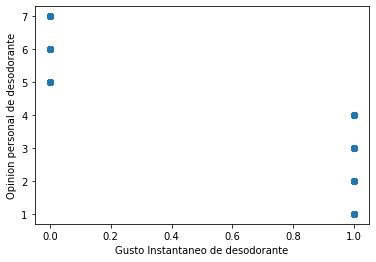

In [43]:
#Determinar la relacion entre q1_1.personal.opinion.of.this.Deodorant y Instant.Liking
#seleccionamos solo la comlumna 8 del dataset (desodorantes atractivos)
data = dataset.values
X=data[:,np.newaxis,3]
#Defino los datos correspondientes a las opinion de desodorante
y=dataset['q1_1.personal.opinion.of.this.Deodorant']
#Graficamos los datos corrrespondientes
plt.scatter(X,y)
plt.xlabel('Gusto Instantaneo de desodorante')
plt.ylabel('Opinion personal de desodorante')
plt.show()

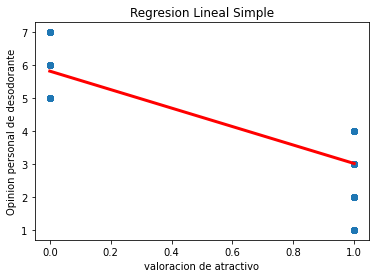

In [44]:
################ IMPLEMENTACION DE REGRESION LINEAL SIMPLE ###################
#Separamos los datos de "train" en entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

#definimos el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno de modelo
lr.fit(X_train,y_train)

#Realizar una prediccion
Y_pred = lr.predict(X_test)

#Graficamos los datos junto con el modelo
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red',linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('valoracion de atractivo')
plt.ylabel('Opinion personal de desodorante')
plt.show()
#Por la naturaleza de los datos obtengo esto ??

In [47]:
################ IMPLEMENTACION DE REGRESION LINEAL MULTIPLE ###################
from sklearn.model_selection import train_test_split
#seleccionamos solo la comlumna 8 del dataset (desodorantes atractivos)
y_multiple=dataset['q1_1.personal.opinion.of.this.Deodorant'].values
dataset.drop(['q1_1.personal.opinion.of.this.Deodorant'],axis=1)
data = dataset.values



In [65]:

X_multiple=data[:,5:33] #Atencion al detalle
#Defino los datos correspondientes a las opinion de desodorante


#Separamos los datos de "train" en entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X_multiple,y_multiple, test_size=0.2)

#definimos el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno de modelo
lr_multiple.fit(X_train,y_train)

#Realizar una prediccion
Y_pred_multiple = lr_multiple.predict(X_test)

print('Datos del modelo de regresion multiple')
print('--------------------------------------')
print('Valor de las pendientes o coeficiente "a":')
print(lr_multiple.coef_)
print()
print('Valor de las interseccion de  "b":')
print(lr_multiple.intercept_)
print()
print('Precision del algoritmo:')
print(lr_multiple.score(X_train,y_train))


Datos del modelo de regresion multiple
--------------------------------------
Valor de las pendientes o coeficiente "a":
[-0.00860614  0.04551305  0.02865612 -0.00817727  0.00873369  0.02865687
 -0.01464876 -0.02335764 -0.02389422 -0.04979089  0.00769426 -0.01143355
 -0.01057535  0.01122893 -0.01367576 -0.02415018 -0.04124554 -0.03525723
 -0.00798691  0.00898315 -0.0051605  -0.00374021 -0.03663284  0.00604947
  0.01459616 -0.01156475 -0.00679608 -0.0568068 ]

Valor de las interseccion de  "b":
5.8173016778804

Precision del algoritmo:
0.011001123211729302
